In [1]:
#Machine Learning
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

#warnings ignore
import warnings
warnings.filterwarnings("ignore")


In [2]:
# seed=2

# # Carregar seu conjunto de dados
# df = pd.read_csv('dataset_final2.csv')

# # manter 80% de dados no df original e retirar 20% para o conjunto de teste e guardar num ficheiro csv para ser usado no teste
# df_train = df.sample(frac=0.80, random_state=seed)
# df_test = df.drop(df_train.index)
# df_test.to_csv('test_set3.csv', index=False)

# # Função para gerar amostras bootstrap
# def bootstrap_sample(data):
#     return data.sample(frac=1, replace=True)

# # Criar um conjunto maior com bootstrap
# num_bootstrap_samples = 10 # Escolha o número desejado de amostras bootstrap
# bootstrap_samples = [bootstrap_sample(df_train) for _ in range(num_bootstrap_samples)]

# # Concatenar as amostras bootstrap com o conjunto de dados original
# bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# # Salvar o conjunto de dados bootstrap
# bootstrap_df.to_csv('bootstrap_samples3.csv', index=False)

### Best Features Selection 

In [3]:
# from itertools import combinations
# from sklearn.metrics import r2_score
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np
# from multiprocessing import Pool  # Adicione esta linha para importar Pool
# import pandas as pd

# def calculate_score(data, target, model, combo, scoring):
#     X = data[list(combo)]
#     model.fit(X, target)
#     predictions = model.predict(X)
#     score = r2_score(target, predictions)
#     return score, combo

# def bestFeatures(data, target, model, n_features, scoring='r2', n_jobs=1):  
#     features = data.columns
#     results = []

#     for k in range(1, n_features + 1):
#         print(f"Calculating for {k} features")
#         combos = list(combinations(features, k))
#         print(f"starting {len(combos)} combinations")
#         pool = Pool(processes=n_jobs)
#         result = pool.starmap(calculate_score, [(data, target, model, combo, scoring) for combo in combos])
#         pool.close()
#         pool.join()
#         results += result

#     results = sorted(results, key=lambda x: x[0], reverse=True)
#     max_score, max_vars = results[0]

#     return max_score, max_vars

# # Read the data bootstrap_samples2.csv
# df = pd.read_csv('bootstrap_samples2.csv', sep=';')
# # Drop from df: dn, tree, bgvi, ps2
# df.drop(['dn', 'tree', 'bgvi', 'ps2', 'rbvi', 'cwsi_1'], axis=1, inplace=True)

# # Read test dataset test_set2.csv
# df_test = pd.read_csv('test_set2.csv', sep=';')
# # Drop from df_test: dn, tree, bgvi, ps2
# df_test.drop(['dn', 'tree', 'bgvi', 'ps2', 'rbvi', 'cwsi_1'], axis=1, inplace=True)

# # Separating features and target
# X_train = df.drop('gsw', axis=1)
# y_train = df['gsw']

# X_test = df_test.drop('gsw', axis=1)
# y_test = df_test['gsw']

# model = RandomForestRegressor(random_state=42)

# # Specify the number of features you want to select
# n_selected_features = 5

# max_score, max_vars = bestFeatures(X_train, y_train, model, n_selected_features, scoring='r2', n_jobs=1)  

# print("Max R2 Score:", max_score)
# print("Best Features:", max_vars)


XGB Regressor 1 rbndvi: 0.2453460842370987
XGB Regressor 2 grvi: 0.2410954087972641
XGB Regressor 3 rn: 0.1381138265132904
XGB Regressor 4 gbndvi: 0.11828713864088058
XGB Regressor 5 cire: 0.05133843794465065
XGB Regressor 6 gndvi: 0.04979005083441734
XGB Regressor 7 rbvi: 0.03820669651031494
XGB Regressor 8 ren: 0.02622712403535843
XGB Regressor 9 psri: 0.021533271297812462
XGB Regressor 10 gn: 0.019082466140389442
XGB Regressor 11 gbvi: 0.016344042494893074
XGB Regressor 12 ndvi: 0.014894173480570316
XGB Regressor 13 ccci: 0.012744003906846046
XGB Regressor 14 bndvi: 0.0065669771283864975
XGB Regressor 15 ndre: 0.0004302732995711267
XGB Regressor 16 grndvi: 0.0
XGB Regressor 17 srpi: 0.0
XGB Regressor 18 sipi: 0.0
RandomForest Regressor 1 rn: 0.23326348860643048
RandomForest Regressor 2 grvi: 0.19059602044198676
RandomForest Regressor 3 rbndvi: 0.11998977524093826
RandomForest Regressor 4 sipi: 0.11537449455997872
RandomForest Regressor 5 gbndvi: 0.06659054680361294
RandomForest Regr

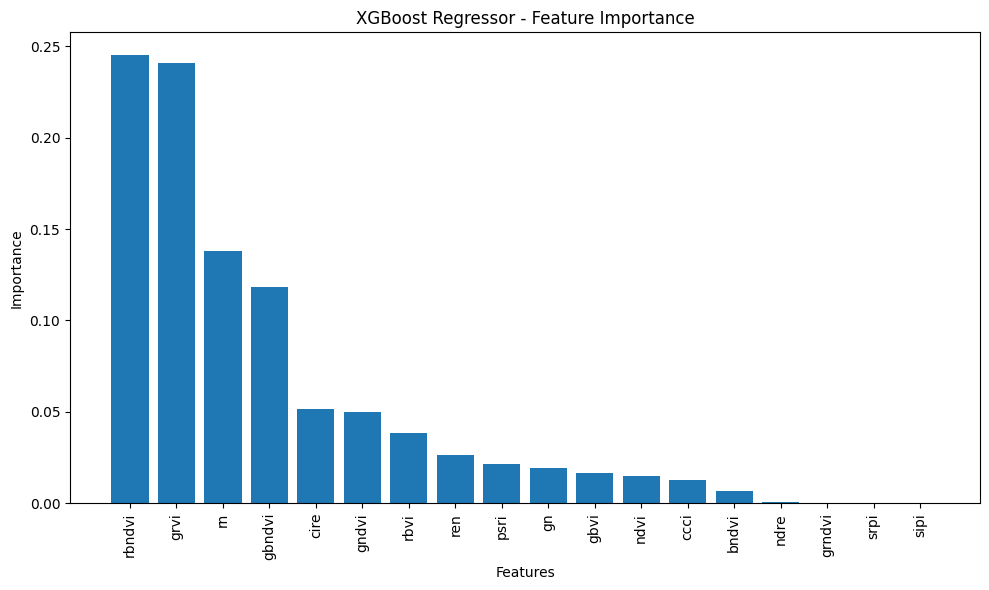

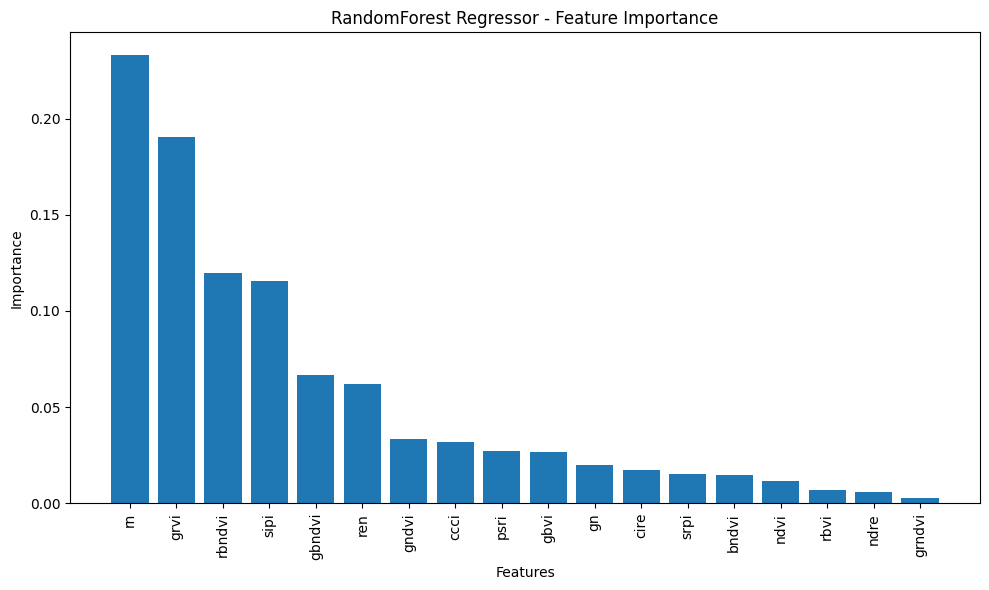

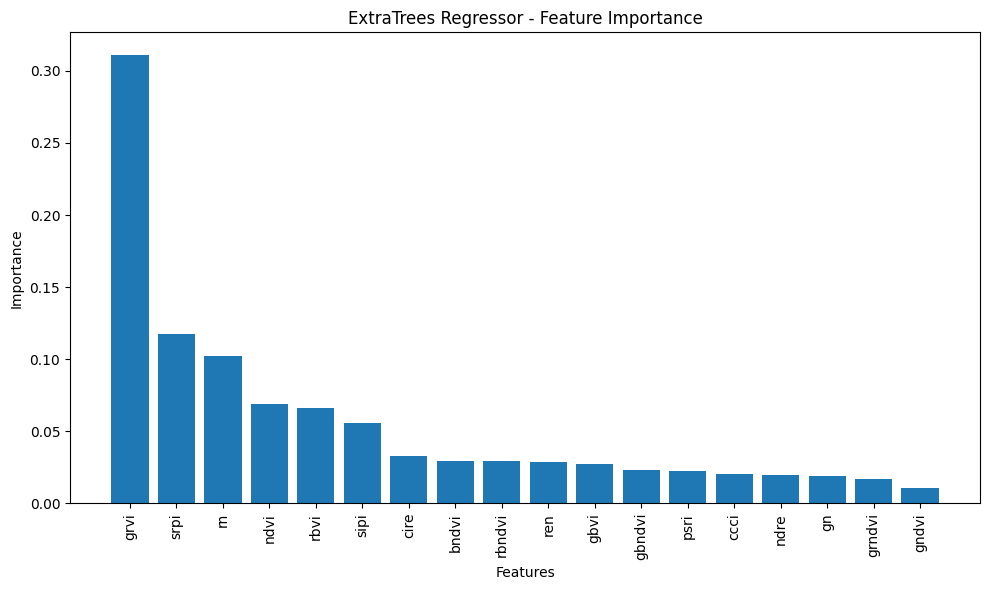

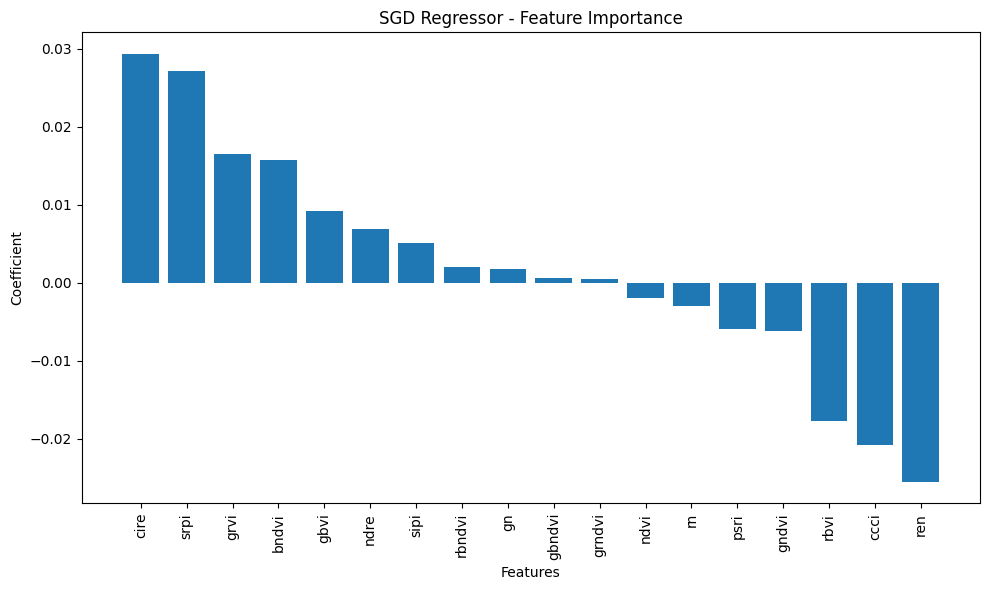

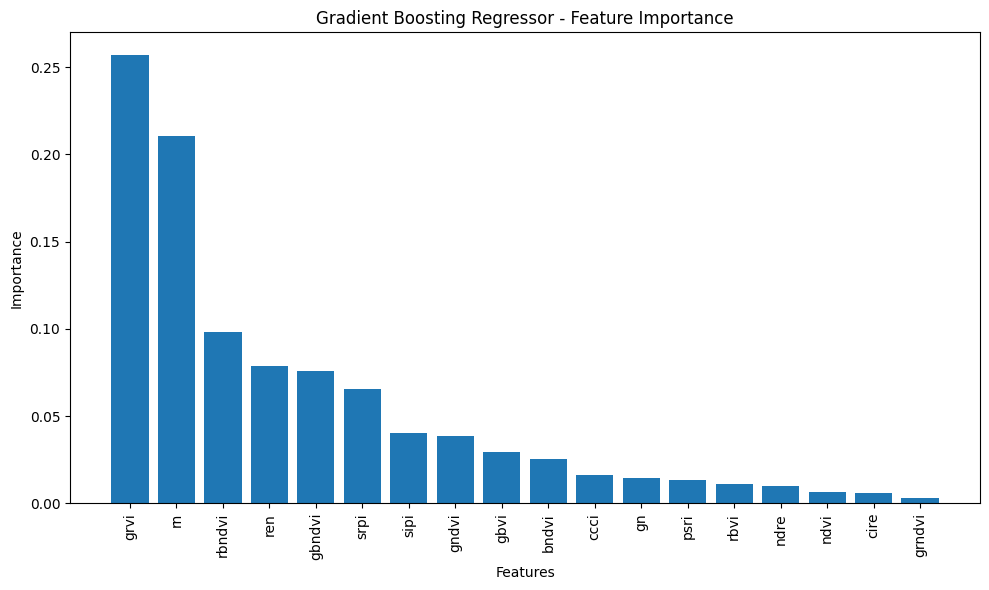

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
import numpy as np
import matplotlib.pyplot as plt

# Read the data bootstrap_samples2.csv
df = pd.read_csv('bootstrap_samples3.csv', sep=';')

df.head()
# Drop unnecessary columns from df: dn, tree, bgvi, ps2, rbvi
df.drop(['dn', 'tree', 'bgvi', 'ps2', 'lst', 'cwsi_0', 'NDTcTa', 'Tc-Ta', 'cwsi', 'Ig', 'I3'], axis=1, inplace=True)

# Read test dataset test_set2.csv
df_test = pd.read_csv('test_set3.csv', sep=';')
# Drop unnecessary columns from df_test: dn, tree, bgvi, ps2, rbvi
df_test.drop(['dn', 'tree', 'bgvi', 'ps2', 'lst', 'cwsi_0', 'NDTcTa', 'Tc-Ta', 'cwsi', 'Ig', 'I3'], axis=1, inplace=True)

# Separating features and target
X_train = df.drop('gsw', axis=1)
y_train = df['gsw']

X_test = df_test.drop('gsw', axis=1)
y_test = df_test['gsw']

# Salvar os nomes das colunas
column_names = X_train.columns

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformar os dados normalizados em DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=column_names)
X_test = pd.DataFrame(X_test_scaled, columns=column_names)


# XGBoost Regressor best features using feature_importances_
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3, objective='reg:squarederror', n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances_xgb = xgb_model.feature_importances_

# Get the indices of the most important features
indices_xgb = np.argsort(feature_importances_xgb)[::-1]

# Get the names of the most important features
names_xgb = [X_train.columns[i] for i in indices_xgb]

# Print the name and importance of each feature
for i in range(X_train.shape[1]):
    print('XGB Regressor', f'{i + 1} {names_xgb[i]}: {feature_importances_xgb[indices_xgb[i]]}')

# RandomForest Regressor best features using feature_importances_
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = rf_model.feature_importances_

# Get the indices of the most important features
indices_rf = np.argsort(feature_importances_rf)[::-1]

# Get the names of the most important features
names_rf = [X_train.columns[i] for i in indices_rf]

# Print the name and importance of each feature
for i in range(X_train.shape[1]):
    print('RandomForest Regressor', f'{i + 1} {names_rf[i]}: {feature_importances_rf[indices_rf[i]]}')

# ExtraTrees Regressor best features using feature_importances_
et_model = ExtraTreesRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=None)
et_model.fit(X_train, y_train)

# Get feature importances
feature_importances_et = et_model.feature_importances_

# Get the indices of the most important features
indices_et = np.argsort(feature_importances_et)[::-1]

# Get the names of the most important features
names_et = [X_train.columns[i] for i in indices_et]

# Print the name and importance of each feature
for i in range(X_train.shape[1]):
    print('ExtraTrees Regressor', f'{i + 1} {names_et[i]}: {feature_importances_et[indices_et[i]]}')

# Stochastic Gradient Descent best features using coefficients
sgd_model = SGDRegressor(random_state=42, max_iter=100000, learning_rate='adaptive')
sgd_model.fit(X_train, y_train)

# Get coefficients
coefficients_sgd = sgd_model.coef_

# Get the indices of the most important features
indices_sgd = np.argsort(coefficients_sgd)[::-1]

# Get the names of the most important features
names_sgd = [X_train.columns[i] for i in indices_sgd]

# Print the name and coefficient of each feature
for i in range(X_train.shape[1]):
    print('SGD Regressor', f'{i + 1} {names_sgd[i]}: {coefficients_sgd[indices_sgd[i]]}')

# Gradient Boosting Regressor best features using feature_importances_
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances_gb = gb_model.feature_importances_

# Get the indices of the most important features
indices_gb = np.argsort(feature_importances_gb)[::-1]

# Get the names of the most important features
names_gb = [X_train.columns[i] for i in indices_gb]

# Print the name and importance of each feature
for i in range(X_train.shape[1]):
    print('Gradient Boosting Regressor', f'{i + 1} {names_gb[i]}: {feature_importances_gb[indices_gb[i]]}')

# Plotting feature importance for each model

# XGBoost Regressor feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_xgb[indices_xgb], align='center')
plt.xticks(range(X_train.shape[1]), names_xgb, rotation=90)
plt.title('XGBoost Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# RandomForest Regressor feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_rf[indices_rf], align='center')
plt.xticks(range(X_train.shape[1]), names_rf, rotation=90)
plt.title('RandomForest Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# ExtraTrees Regressor feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_et[indices_et], align='center')
plt.xticks(range(X_train.shape[1]), names_et, rotation=90)
plt.title('ExtraTrees Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Stochastic Gradient Descent feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), coefficients_sgd[indices_sgd], align='center')
plt.xticks(range(X_train.shape[1]), names_sgd, rotation=90)
plt.title('SGD Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

# Gradient Boosting Regressor feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_gb[indices_gb], align='center')
plt.xticks(range(X_train.shape[1]), names_gb, rotation=90)
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Read the data bootstrap_samples2.csv
df = pd.read_csv('bootstrap_samples3.csv', sep=';')
# drop from df: dn, tree, bgvi, ps2
df.drop(['dn', 'tree', 'bgvi', 'ps2'], axis=1, inplace=True)

# Read test dataset test_set2.csv
df_test = pd.read_csv('test_set3.csv', sep=';')
# drop from df_test: dn, tree, bgvi, ps2
df_test.drop(['dn', 'tree', 'bgvi', 'ps2'], axis=1, inplace=True)

# Separating features and target
X_train = df.drop('gsw', axis=1)
y_train = df['gsw']

X_test = df_test.drop('gsw', axis=1)
y_test = df_test['gsw']

# Salvar os nomes das colunas
column_names = X_train.columns

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformar os dados normalizados em DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=column_names)
X_test = pd.DataFrame(X_test_scaled, columns=column_names)

# XGBoost Regressor
X_train_xgb_5 = X_train[['Tc-Ta', 'rbndvi', 'gbndvi', 'gndvi', 'rbvi', 'cire']]#X_train[['gbndvi', 'rn', 'rbndvi', 'cire']]
X_test_xgb_5 = X_test[['Tc-Ta', 'rbndvi', 'gbndvi', 'gndvi', 'rbvi', 'cire']]#X_test[['gbndvi', 'rn', 'rbndvi', 'cire']]

xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3, objective='reg:squarederror', n_jobs=-1)
xgb_model.fit(X_train_xgb_5, y_train)

# Evaluate XGBoost Regressor
y_pred_xgb = xgb_model.predict(X_test_xgb_5)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
n = len(y_test)
k = X_test_xgb_5.shape[1]
adj_r2_xgb = 1 - (1 - r2_xgb) * (n - 1) / (n - k - 1)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print('\nXGBoost Regressor:')
print('Melhores Hiperparâmetros:', xgb_model.get_params())
print('MSE:', mse_xgb)
print('R2:', r2_xgb)
#print('Adjusted R2:', adj_r2_xgb)
print('MAE:', mae_xgb)

# RandomForest Regressor
X_train_rf_5 = X_train[['cwsi', 'ccci', 'srpi', 'ren', 'gndvi', 'lst', 'gbndvi', 'grvi', 'I3', 'Ig', 'gbvi', 'gn', 'rbndvi', 'cire', 'ndvi', 'bndvi']]
X_test_rf_5 = X_test[['cwsi', 'ccci', 'srpi', 'ren', 'gndvi', 'lst', 'gbndvi', 'grvi', 'I3', 'Ig', 'gbvi', 'gn', 'rbndvi', 'cire', 'ndvi', 'bndvi']]

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='r2')
rf_grid.fit(X_train_rf_5, y_train)
rf_model_best = rf_grid.best_estimator_

# Evaluate RandomForest Regressor
y_pred_rf = rf_model_best.predict(X_test_rf_5)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
n = len(y_test)
k = X_test_rf_5.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - k - 1)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print('\nRandomForest Regressor:')
print('Melhores Hiperparâmetros:', rf_grid.best_params_)
print('MSE:', mse_rf)
print('R2:', r2_rf)
#print('Adjusted R2:', adj_r2_rf)
print('MAE:', mae_rf)

# ExtraTrees Regressor
X_train_et_5 = X_train[['grvi', 'srpi', 'rn', 'ndvi', 'rbndvi', 'bndvi', 'gbvi', 'ren', 'Ig']]
X_test_et_5 = X_test[['grvi', 'srpi', 'rn', 'ndvi', 'rbndvi', 'bndvi', 'gbvi', 'ren', 'Ig']]

et_model = ExtraTreesRegressor(random_state=42, n_jobs=-1)
et_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
et_grid = GridSearchCV(et_model, et_param_grid, cv=3, scoring='r2')
et_grid.fit(X_train_et_5, y_train)
et_model_best = et_grid.best_estimator_

# Evaluate ExtraTrees Regressor
y_pred_et = et_model_best.predict(X_test_et_5)
mse_et = mean_squared_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)
n = len(y_test)
k = X_test_et_5.shape[1]
adj_r2_et = 1 - (1 - r2_et) * (n - 1) / (n - k - 1)
mae_et = mean_absolute_error(y_test, y_pred_et)

print('\nExtraTrees Regressor:')
print('Melhores Hiperparâmetros:', et_grid.best_params_)
print('MSE:', mse_et)
print('R2:', r2_et)
#print('Adjusted R2:', adj_r2_et)
print('MAE:', mae_et)

# stochastic gradient descent with hyperparameter tuning
X_train_sgd_5 = X_train[['cire', 'srpi', 'Ig', 'bndvi', 'grvi']]
X_test_sgd_5 = X_test[['cire', 'srpi', 'Ig', 'bndvi', 'grvi']]

sgd = SGDRegressor(random_state=42)
param_grid = {'max_iter': [100000, 200000, 300000], 'learning_rate': ['constant', 'optimal', 'adaptive']}
sgd_grid = GridSearchCV(sgd, param_grid, cv=3, scoring='r2')
sgd_grid.fit(X_train_sgd_5, y_train)
sgd_best = sgd_grid.best_estimator_

# Evaluate SGD Regressor
y_pred_sgd = sgd_best.predict(X_test_sgd_5)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
n = len(y_test)
k = X_test_sgd_5.shape[1]
adj_r2_sgd = 1 - (1 - r2_sgd) * (n - 1) / (n - k - 1)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)

print('\nSGD Regressor:')
print('Melhores Hiperparâmetros:', sgd_grid.best_params_)
print('MSE:', mse_sgd)
print('R2:', r2_sgd)
#print('Adjusted R2:', adj_r2_sgd)
print('MAE:', mae_sgd)

# Criando o modelo SGB
X_train_sgb_5 = X_train[['grvi', 'ren', 'srpi', 'cwsi', 'ccci', 'gbndvi', 'rbndvi', 'gndvi', 'bndvi', 'sipi', 'gbvi', 'rn', 'Ig', 'psri', 'cire']]
X_test_sgb_5 = X_test[['grvi', 'ren', 'srpi', 'cwsi', 'ccci', 'gbndvi', 'rbndvi', 'gndvi', 'bndvi', 'sipi', 'gbvi', 'rn', 'Ig', 'psri', 'cire']]

sgb = GradientBoostingRegressor(random_state=42)

param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
sgb_grid = GridSearchCV(sgb, param_grid, cv=3, scoring='r2', verbose=1)
sgb_grid.fit(X_train_sgb_5, y_train)

sgb_best = sgb_grid.best_estimator_

y_pred_sgb = sgb_best.predict(X_test_sgb_5)

mse_sgb = mean_squared_error(y_test, y_pred_sgb)
r2_sgb = r2_score(y_test, y_pred_sgb)
n = len(y_test)
k = X_test_sgb_5.shape[1]
#adj_r2_sgb = 1 - (1 - r2_sgb) * (n - 1) / (n - k - 1)
mae_sgb = mean_absolute_error(y_test, y_pred_sgb)

print('\nSGB Regressor:')
print('Melhores Hiperparâmetros:', sgb_grid.best_params_)
print('MSE:', mse_sgb)
print('R2:', r2_sgb)
#print('Adjusted R2:', adj_r2_sgb)
print('MAE:', mae_sgb)



XGBoost Regressor:
Melhores Hiperparâmetros: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
MSE: 0.0016152466589041093
R2: 0.8694342148594154
MAE: 0.03478

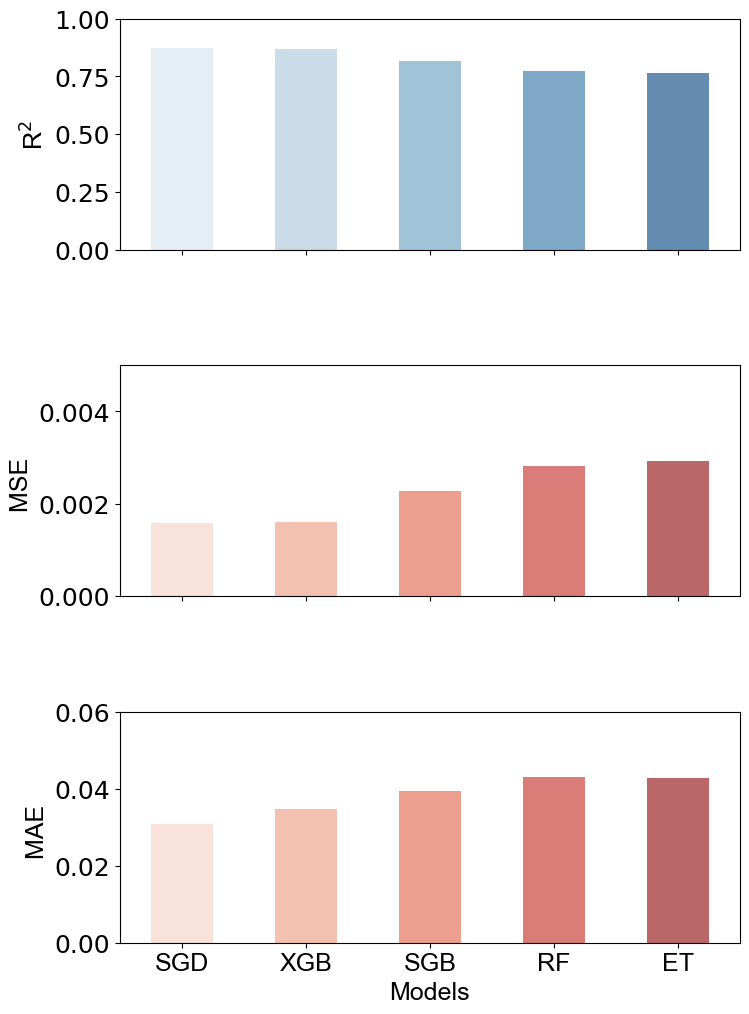

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the MSE (positive) and R2 (positive) into a single DataFrame
df_combined = pd.DataFrame({
    'Model': ['XGB', 'RF', 'ET', 'SGD', 'SGB'],
    'MSE': [mse_xgb, mse_rf, mse_et, mse_sgd, mse_sgb],
    'R2': [r2_xgb, r2_rf, r2_et, r2_sgd, r2_sgb],
    'MAE': [mae_xgb, mae_rf, mae_et, mae_sgd, mae_sgb]
})

# Sort the DataFrame by R2 scores
df_combined = df_combined.sort_values(by='R2', ascending=False)

# Create subplots without vertical gap
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Plot R2 scores
sns.barplot(data=df_combined, x='Model', y='R2', palette='Blues', alpha=0.7, ax=ax1, order=df_combined['Model'], width=0.5)
ax1.set_ylabel('R$^2$', fontdict={'family': 'Arial', 'size': 18})
ax1.tick_params(axis='y', labelsize=18)
# y limits
ax1.set_ylim(0, 1)

# Plot MSE scores
sns.barplot(data=df_combined, x='Model', y='MSE', palette='Reds', alpha=0.7, ax=ax2, order=df_combined['Model'], width=0.5)
ax2.set_ylabel('MSE ', fontdict={'family': 'Arial', 'size': 18})
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylim(0, 0.005)

# Plot MAE scores
sns.barplot(data=df_combined, x='Model', y='MAE', palette='Reds', alpha=0.7, ax=ax3, order=df_combined['Model'], width=0.5)
ax3.set_ylabel('MAE ', fontdict={'family': 'Arial', 'size': 18})
ax3.tick_params(axis='y', labelsize=18)
#y limits
ax3.set_ylim(0, 0.06)

# Customize the plots
plt.xticks(rotation=0, fontname='Arial', fontsize=18)
plt.xlabel('Models', fontdict={'family': 'Arial', 'size': 18})
plt.subplots_adjust(hspace=0.5)  # Increase vertical gap between subplots

# Save the figure as an SVG file
plt.savefig('Manuscript/images/R2_mse_mae_gsw_only_tds.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()


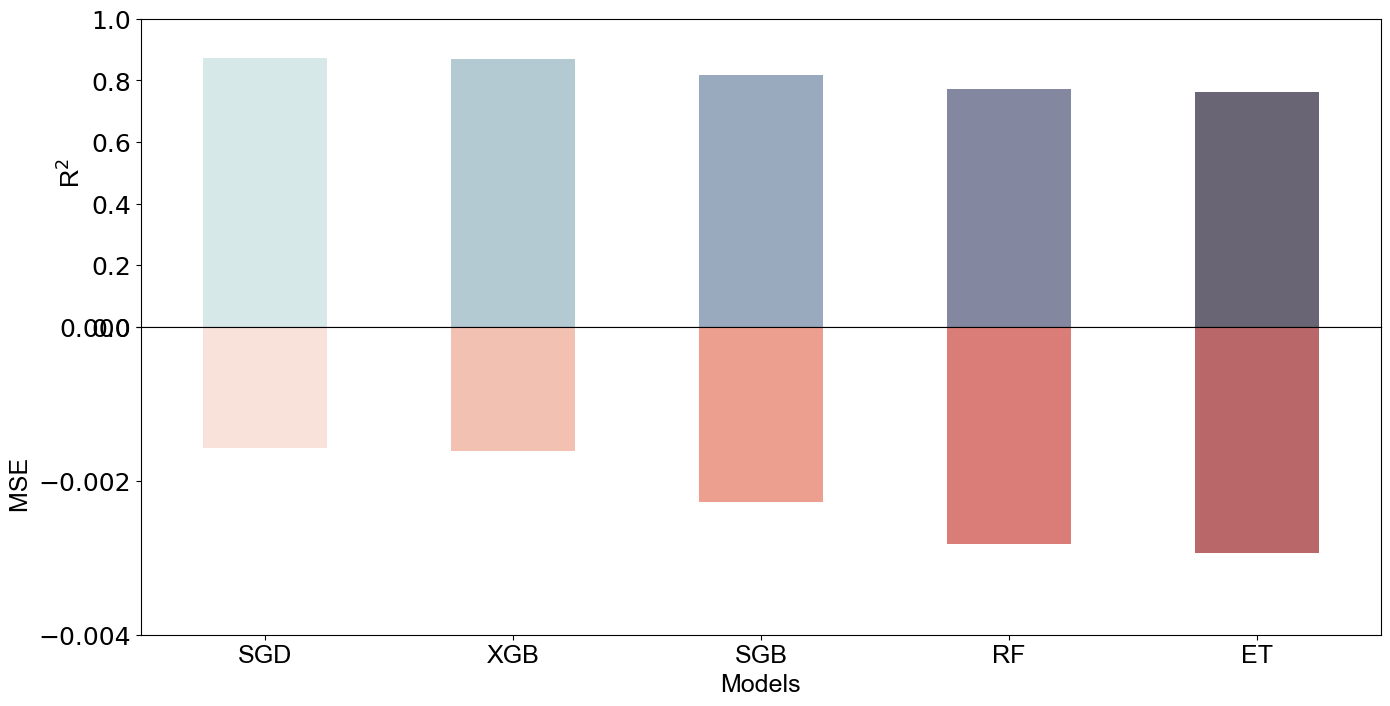

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# torna os valores do mse negativos para todos os modelos
mse_xgb = -mse_xgb
mse_rf = -mse_rf
mse_et = -mse_et
mse_sgd = -mse_sgd
mse_sgb = -mse_sgb

# Combine the MSE (negative) and R2 (positive) into a single DataFrame
df_combined = pd.DataFrame({
    'Model': ['XGB', 'RF', 'ET', 'SGD', 'SGB'],
    'MSE': [mse_xgb, mse_rf, mse_et, mse_sgd, mse_sgb],  # Making MSE negative
    'R2': [r2_xgb, r2_rf, r2_et, r2_sgd, r2_sgb]
})

# Sort the DataFrame by R2 scores
df_combined = df_combined.sort_values(by='R2', ascending=False)

# Create subplots without vertical gap
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Plot R2 scores
sns.barplot(data=df_combined, x='Model', y='R2', palette='ch:start=.2,rot=-.3', alpha=0.7, ax=ax1, errorbar=None, capsize=0.2, errwidth=1.5, width=0.5)
ax1.set_ylabel('R$^2$', fontdict={'family': 'Arial', 'size': 18})
#R2 ticks size
ax1.tick_params(axis='y', labelsize=18)

# Plot MSE scores
sns.barplot(data=df_combined, x='Model', y='MSE', palette='Reds', alpha=0.7, ax=ax2, errorbar=None, capsize=0.2, errwidth=1.5, width=0.5)
ax2.set_ylabel('MSE ', fontdict={'family': 'Arial', 'size': 18})
#MSE ticks size
ax2.tick_params(axis='y', labelsize=18)

# yaxis with intervals of 0.2 from 0 to 1
ax1.set_yticks(np.arange(0, 1.1, 0.2))
ax2.set_yticks(np.arange(0, -0.005, -0.0020))

# Customize the plots
plt.xticks(rotation=0, fontname='Arial', fontsize=18)
plt.xlabel('Models', fontdict={'family': 'Arial', 'size': 18})
plt.subplots_adjust(hspace=0)  # Remove vertical gap between subplots

# Save the figure as an SVG file
plt.savefig('Manuscript/images/R2_mse_gsw_only_tds.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

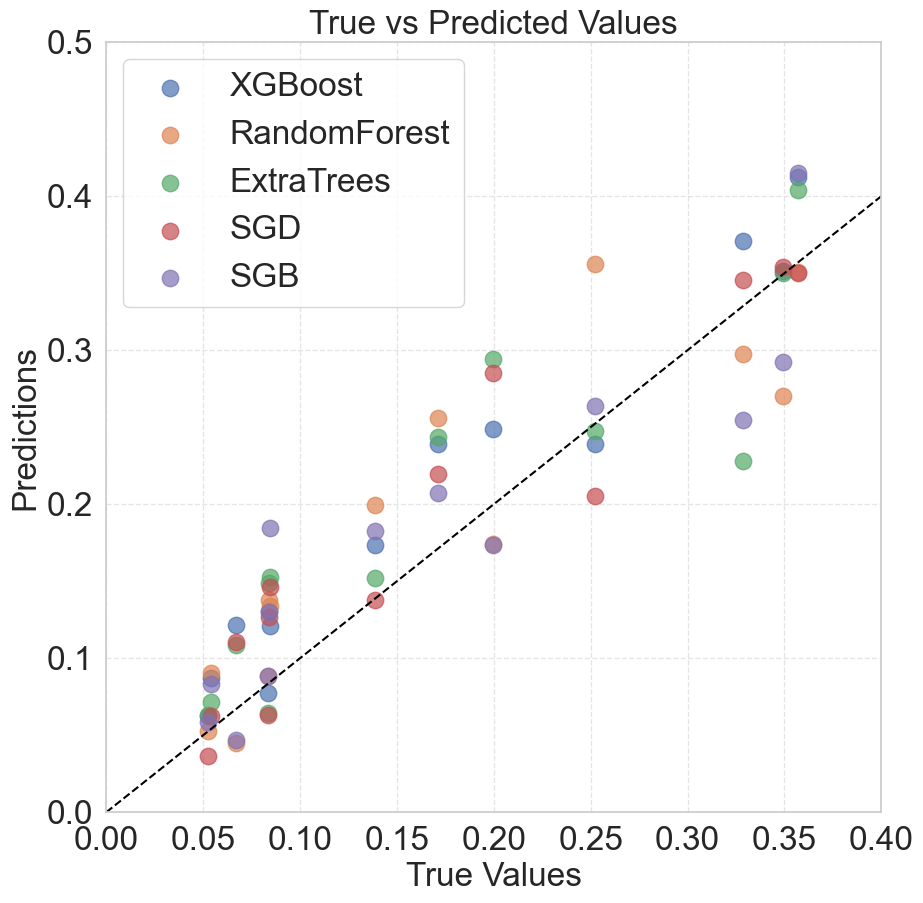

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o estilo seaborn
sns.set(style="whitegrid")

# Define o tamanho e tipo de letra padrão
font_properties = {'family': 'Arial', 'size': 24}

# Tamanho do gráfico
plt.figure(figsize=(10, 10))

# Scatter plot para cada modelo
plt.scatter(y_test, y_pred_xgb, label='XGBoost', s=140, alpha=0.7)
plt.scatter(y_test, y_pred_rf, label='RandomForest', s=140, alpha=0.7)
plt.scatter(y_test, y_pred_et, label='ExtraTrees', s=140, alpha=0.7)
# plt.scatter(y_test, y_pred_lr, label='Linear Regression', s=60, alpha=0.7)
plt.scatter(y_test, y_pred_sgd, label='SGD', s=140, alpha=0.7)
plt.scatter(y_test, y_pred_sgb, label='SGB', s=140, alpha=0.7)

# Linha de referência
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Configurações adicionais
plt.xlabel('True Values', **font_properties)
plt.ylabel('Predictions', **font_properties)
plt.title('True vs Predicted Values', **font_properties)
plt.xlim([0, 0.40])
plt.ylim([0, 0.50])
plt.legend(prop=font_properties)
plt.grid(True, linestyle='--', alpha=0.5)

# Ajusta o tamanho da fonte das marcações nos eixos
plt.xticks(fontproperties='Arial', fontsize=24)
plt.yticks(fontproperties='Arial', fontsize=24)

# Salva o gráfico em formato SVG
plt.savefig('Manuscript/images/truevalues_vs_predictions_gsw_only_tds.svg', format='svg', bbox_inches='tight')

# Exibe o gráfico
plt.show()


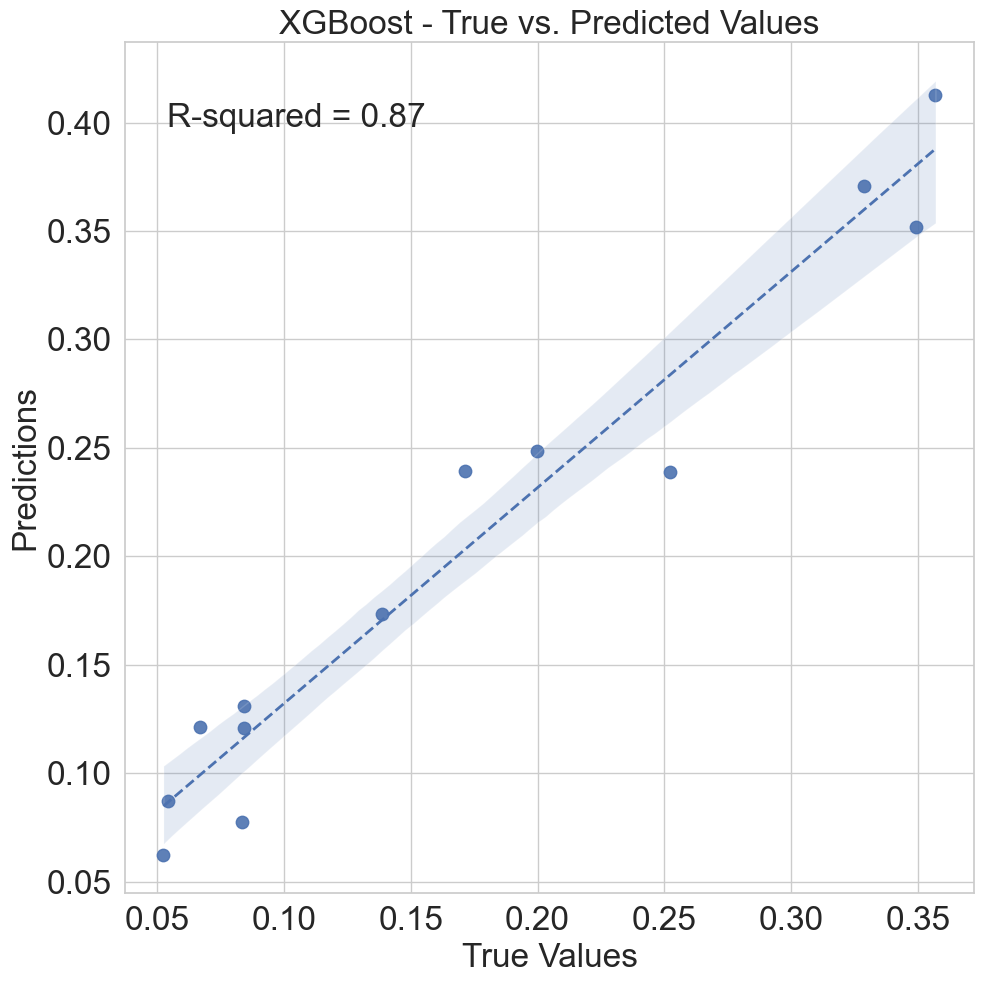

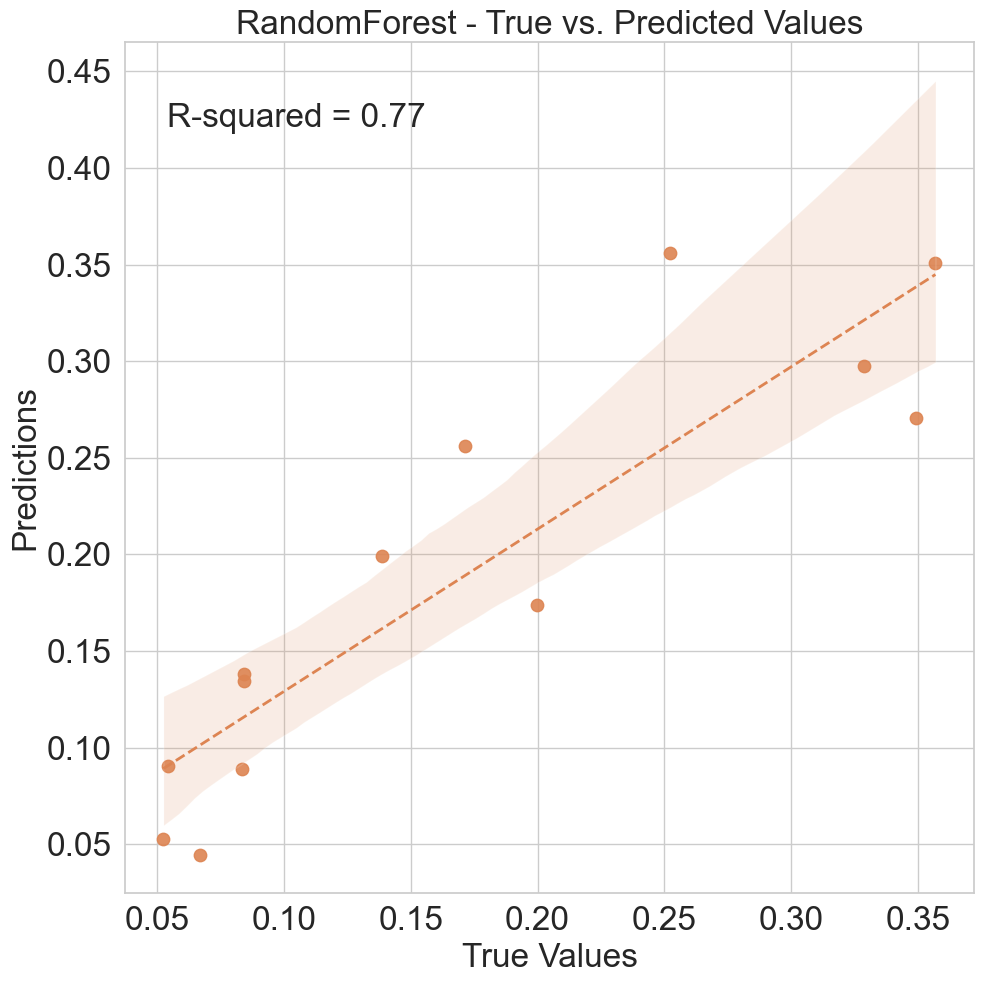

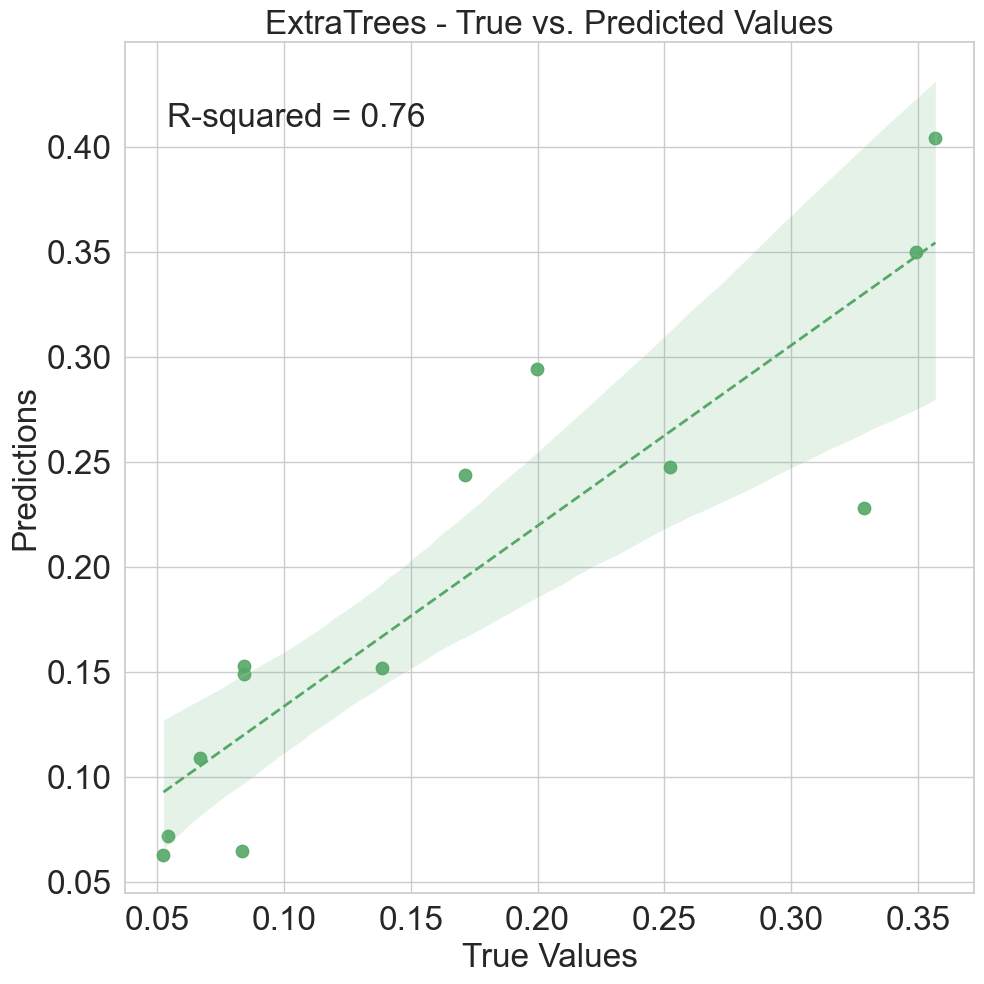

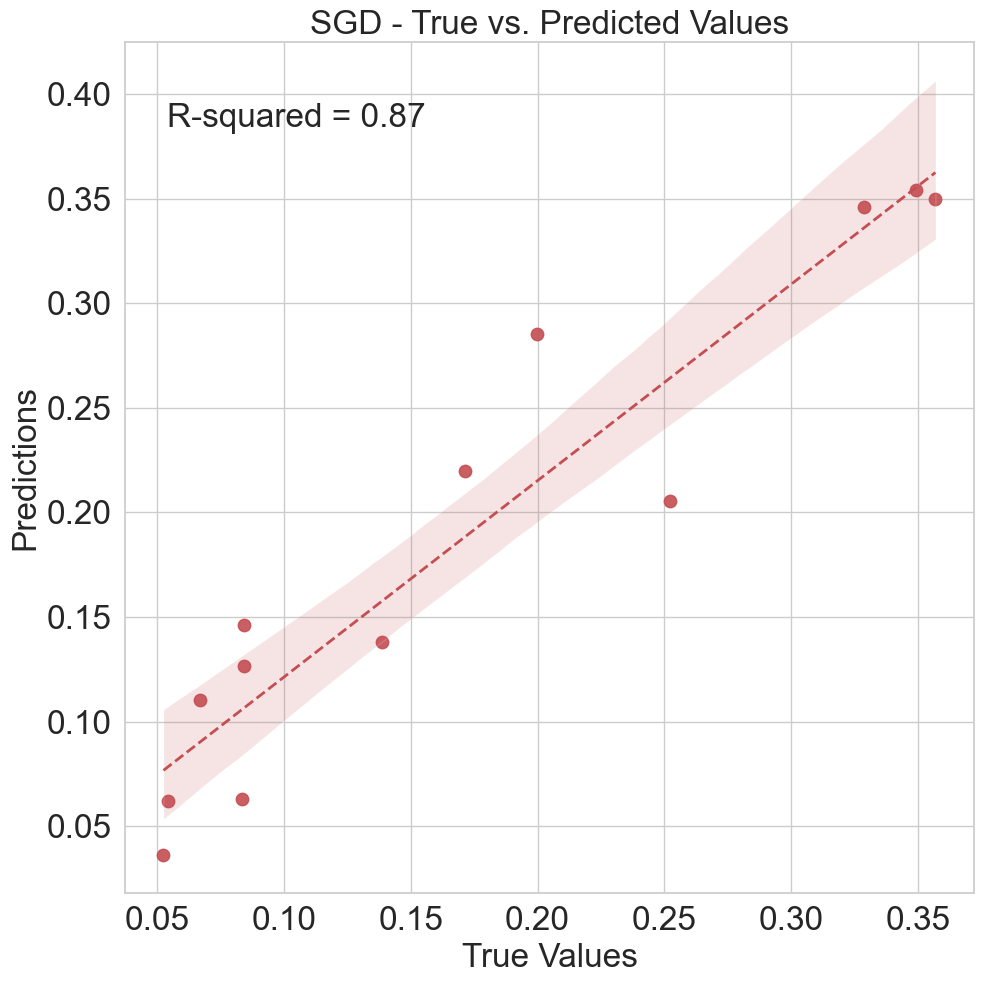

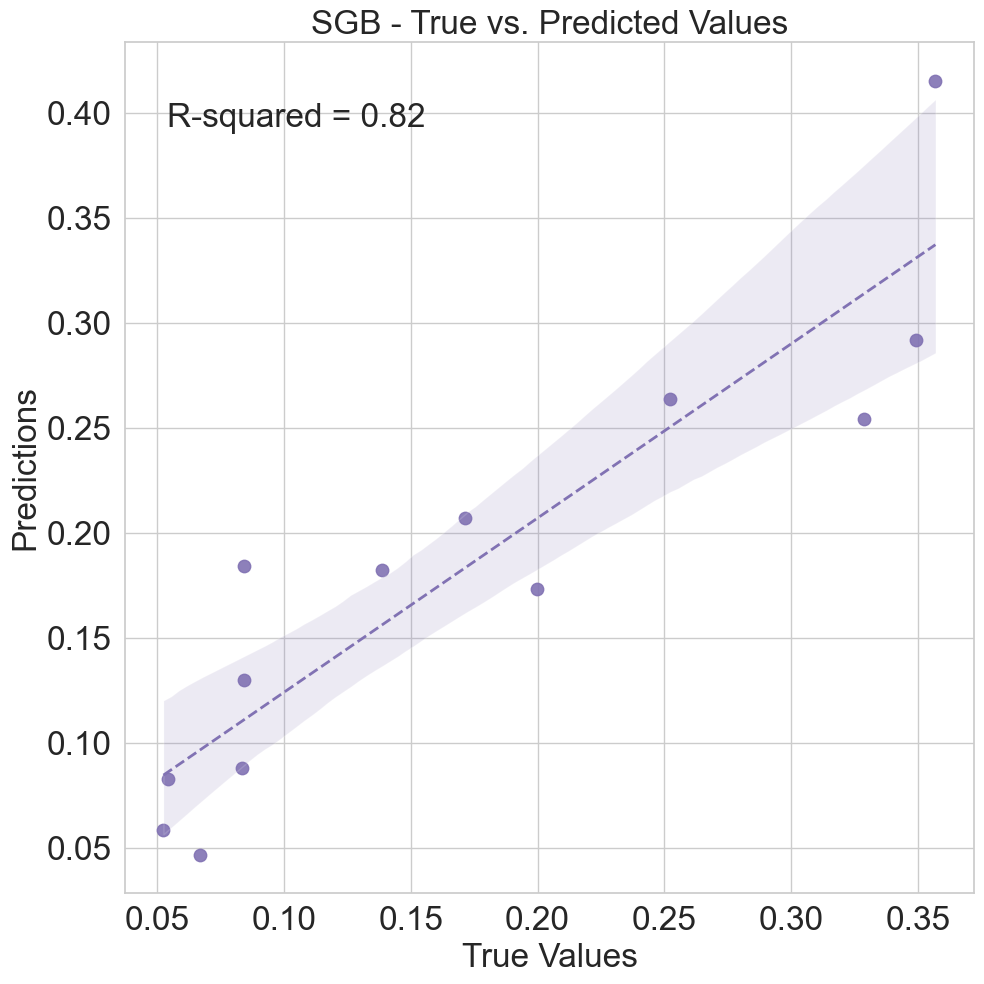

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming y_test, y_pred_xgb, y_pred_rf, y_pred_et, y_pred_lr, y_pred_sgd are defined

# Define a função para plotar y_pred vs y_test para cada modelo
def plot_regression(y_test, y_pred, model_name, filename, color):
    # Cria objetos de figura e eixo
    fig, ax = plt.subplots(figsize=(10, 10))

    # Ajusta o tamanho dos pontos para 50 (ou o valor desejado)
    scatter_kws = {'s': 80, 'alpha': 0.9}

    # Cria o scatter plot com linha de regressão e intervalo de confiança
    sns.regplot(x=y_test, y=y_pred, ax=ax, scatter_kws=scatter_kws, ci=95, color=color, line_kws={'linestyle': '--', 'linewidth': 2})

    # Adiciona rótulos e título com fonte Arial e tamanho 14
    font_properties = {'fontsize': 24, 'fontname': 'Arial'}
    ax.set_xlabel('True Values', **font_properties)
    ax.set_ylabel('Predictions', **font_properties)
    ax.set_title(f'{model_name} - True vs. Predicted Values', **font_properties)

    # Personaliza rótulos dos ticks
    ax.tick_params(axis='both', which='major', labelsize=24)
    
    # Adiciona anotações
    ax.text(0.05, 0.9, f'R-squared = {r2_score(y_test, y_pred):.2f}', transform=ax.transAxes, **font_properties)

    # Adiciona grid
    ax.grid(True)

    # Ajusta layout
    plt.tight_layout()

    # Salva o gráfico em formato SVG antes de exibi-lo
    plt.savefig(filename, format='svg', bbox_inches='tight')

    # Exibe o gráfico
    plt.show()

# Plot para XGBoost
plot_regression(y_test, y_pred_xgb, 'XGBoost', 'Manuscript/images/xgb_true_vs_pred_gsw_only_tds.svg', '#4c72b0b2')

# Plot para RandomForest
plot_regression(y_test, y_pred_rf, 'RandomForest', 'Manuscript/images/rf_true_vs_pred_gsw_only_tds.svg', '#dd8452b2')

# Plot para ExtraTrees
plot_regression(y_test, y_pred_et, 'ExtraTrees', 'Manuscript/images/et_true_vs_pred_gsw_only_tds.svg', '#55a868b2')

# Plot para SGD
plot_regression(y_test, y_pred_sgd, 'SGD', 'Manuscript/images/sgd_true_vs_pred_gsw_only_tds.svg', '#c44e52b2')

# Plot para SGB
plot_regression(y_test, y_pred_sgb, 'SGB', 'Manuscript/images/sgb_true_vs_pred_gsw_only_tds.svg', '#8172b3b2')


Using 540 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 13/13 [00:01<00:00, 11.52it/s]


XGBoost


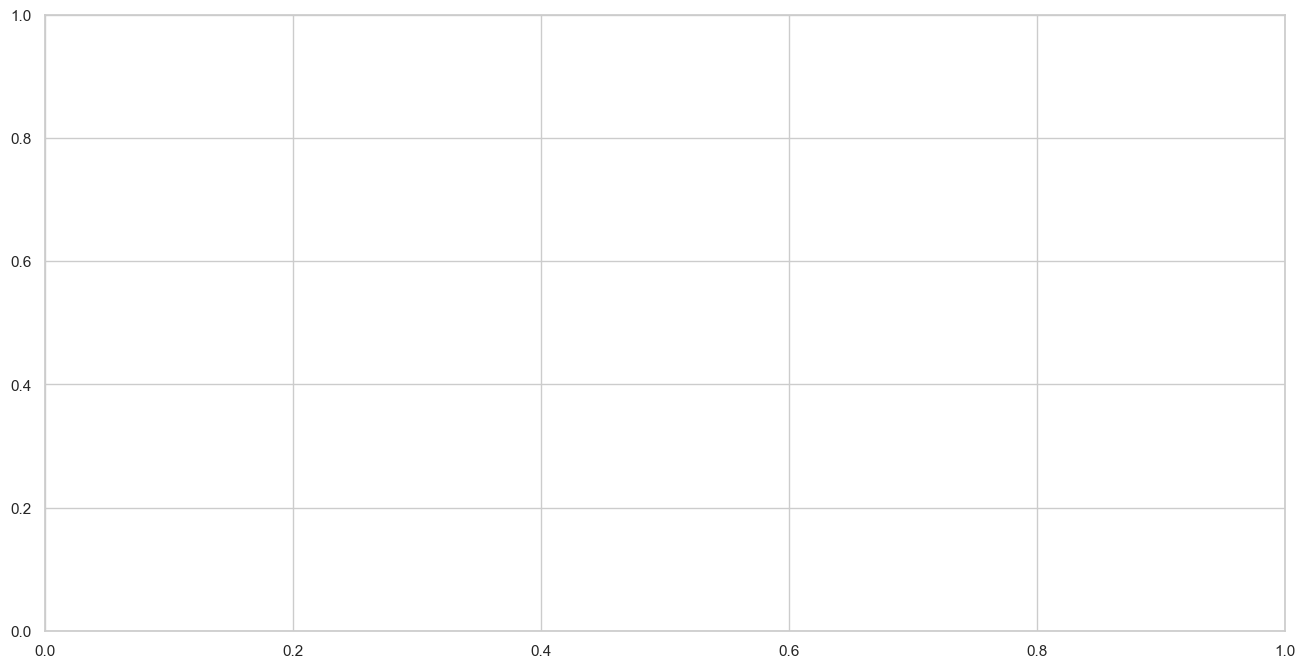

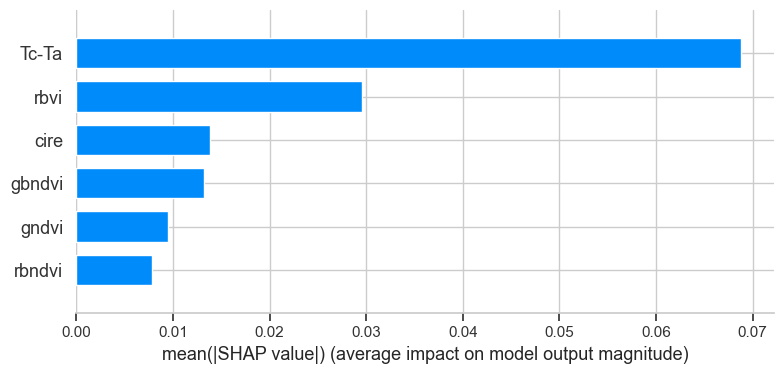

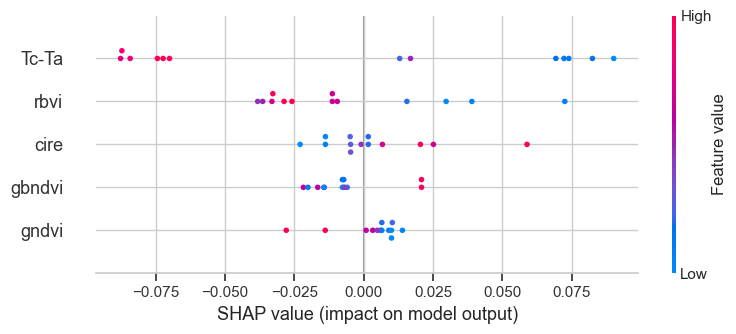

RandomForest


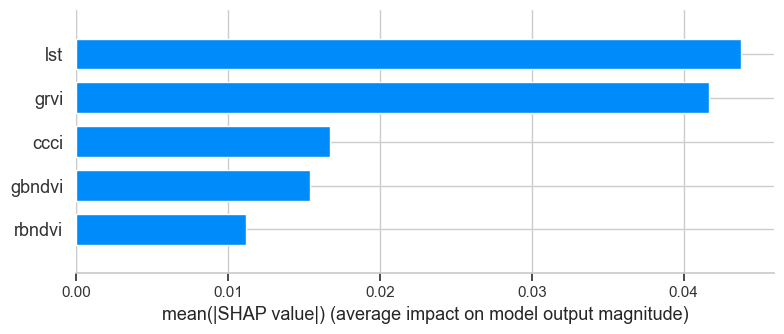

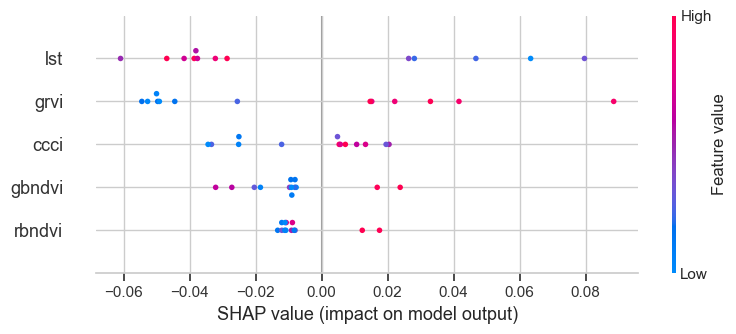

ExtraTrees


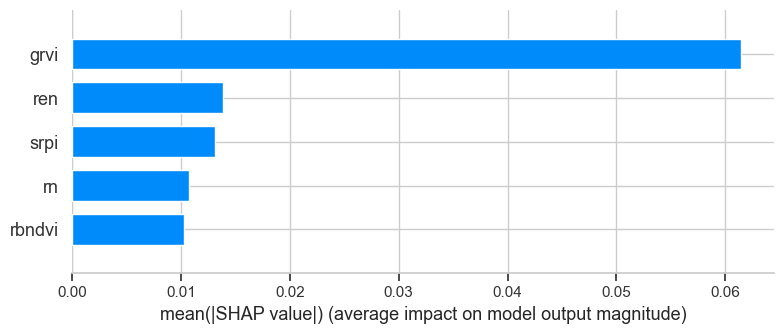

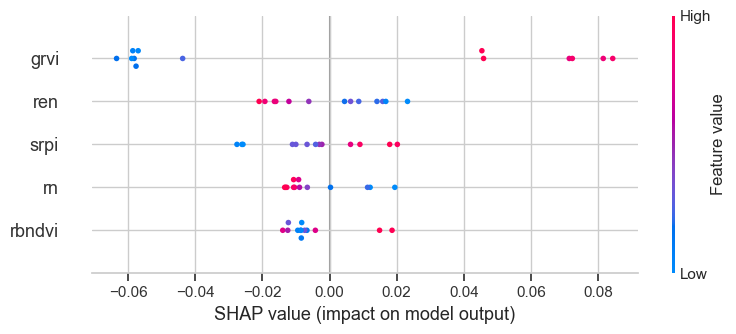

SGD


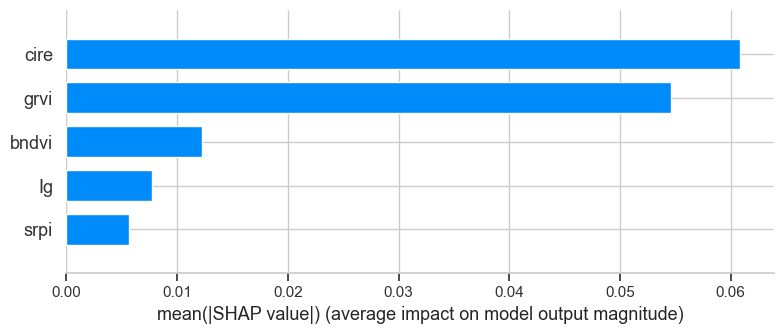

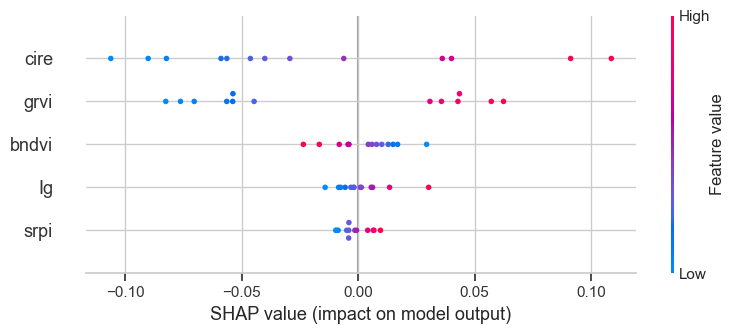

SGB


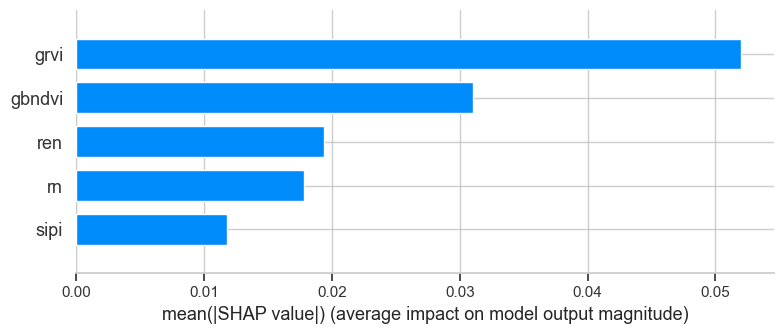

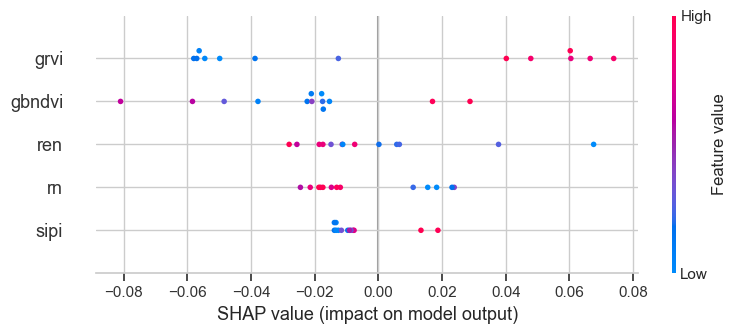

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

# Set font and size
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 12

# Create the explainer objects
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_xgb_5)

explainer_rf = shap.Explainer(rf_model_best)
shap_values_rf = explainer_rf.shap_values(X_test_rf_5)

explainer_et = shap.Explainer(et_model_best)
shap_values_et = explainer_et.shap_values(X_test_et_5)

explainer_sgd = shap.KernelExplainer(sgd_best.predict, X_train_sgd_5)
shap_values_sgd = explainer_sgd.shap_values(X_test_sgd_5)

explainer_sgb = shap.Explainer(sgb_best)
shap_values_sgb = explainer_sgb.shap_values(X_test_sgb_5)

# Set the size of the plots
fig, ax = plt.subplots(figsize=(16, 8))

# Summary plot for XGBoost
print('XGBoost')
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_xgb, X_test_xgb_5, plot_type='bar', max_display=6)
plt.show()

# Beeswarm plot for XGBoost
plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values_xgb, X_test_xgb_5, max_display=5)
plt.show()

# Summary plot for RandomForest
print('RandomForest')
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_rf, X_test_rf_5, plot_type='bar', max_display=5)
plt.show()

# Beeswarm plot for RandomForest
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_rf, X_test_rf_5, max_display=5)
plt.show()

# Summary plot for ExtraTrees
print('ExtraTrees')
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_et, X_test_et_5, plot_type='bar', max_display=5)
plt.show()

# Beeswarm plot for ExtraTrees
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_et, X_test_et_5, max_display=5)
plt.show()

# Summary plot for SGD
print('SGD')
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_sgd, X_test_sgd_5, plot_type='bar', max_display=5)
plt.show()

# Beeswarm plot for SGD
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_sgd, X_test_sgd_5, max_display=5)
plt.show()

# Summary plot for SGB
print('SGB')
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_sgb, X_test_sgb_5, plot_type='bar', max_display=5)
plt.show()

# Beeswarm plot for SGB
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values_sgb, X_test_sgb_5, max_display=5)
plt.show()


XGBoost


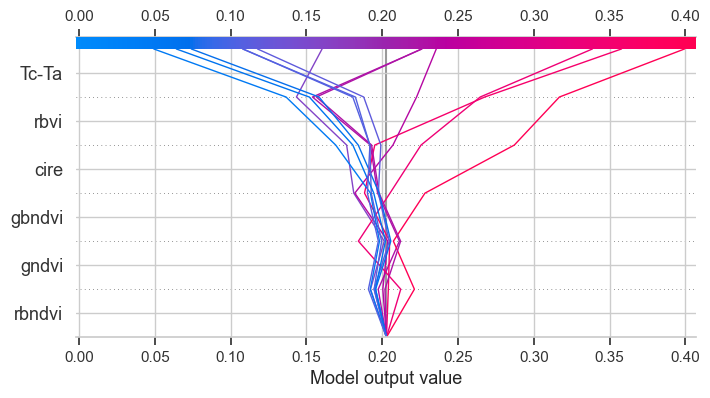

RandomForest


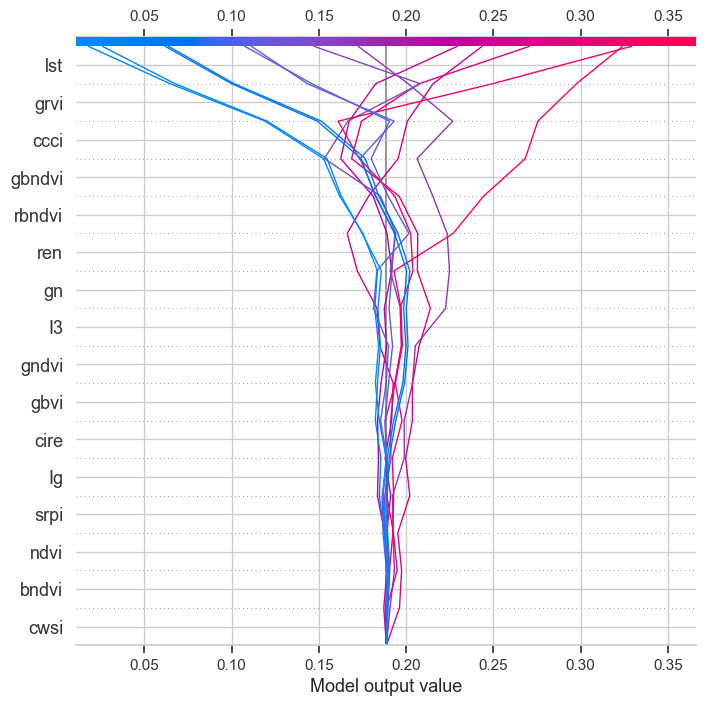

ExtraTrees


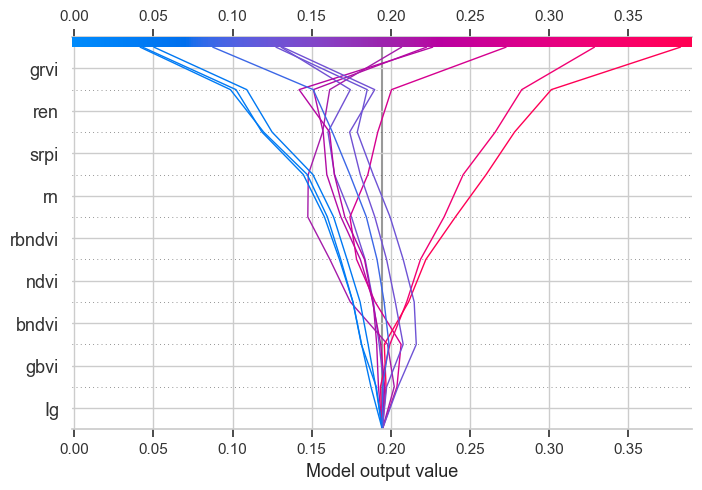

SGD


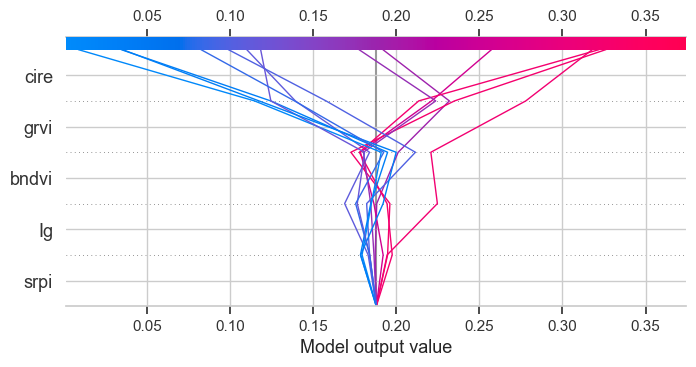

SGB


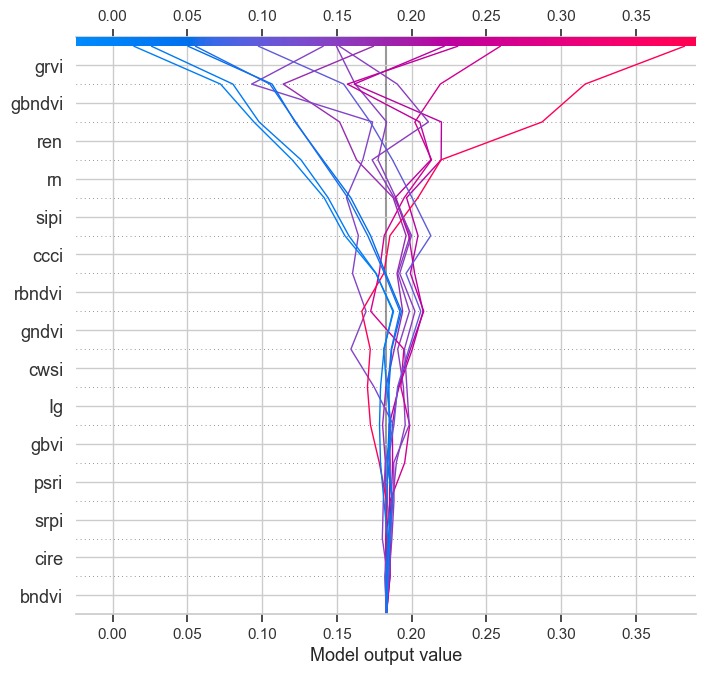

In [11]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Set font and size
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 12

# Set the size of the plots
fig, ax = plt.subplots(figsize=(16, 8))

# XGB
print('XGBoost')
expected_value_xgb = np.mean(xgb_model.predict(X_test_xgb_5))
shap.decision_plot(expected_value_xgb, shap_values_xgb, X_test_xgb_5)
plt.show()

# RF
print('RandomForest')
expected_value_rf = np.mean(rf_model_best.predict(X_test_rf_5))
shap.decision_plot(expected_value_rf, shap_values_rf, X_test_rf_5)
plt.show()

# ET
print('ExtraTrees')
expected_value_et = np.mean(et_model_best.predict(X_test_et_5))
shap.decision_plot(expected_value_et, shap_values_et, X_test_et_5)
plt.show()

# SGD
print('SGD')
expected_value_sgd = np.mean(sgd_best.predict(X_test_sgd_5))
shap.decision_plot(expected_value_sgd, shap_values_sgd, X_test_sgd_5)
plt.show()

# SGB
print('SGB')
expected_value_sgb = np.mean(sgb_best.predict(X_test_sgb_5))
shap.decision_plot(expected_value_sgb, shap_values_sgb, X_test_sgb_5)
plt.show()
